<a href="https://colab.research.google.com/github/miaomiao1124/-nhanes_inferential_2023/blob/main/nhanes_inferential_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import package

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2, palette= "viridis")
from sklearn.preprocessing import scale
from scipy import stats


#import data

In [12]:
demo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/DEMO_L.XPT', format='xport')

bp = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/BPXO_L.XPT', format='xport')
body = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/BMX_L.XPT', format='xport')
print(body)
chol_total = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/TCHOL_L.XPT', format='xport')
print(chol_total)
glycohemo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/GHB_L.XPT', format='xport')
crp = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/HSCRP_L.XPT', format='xport')
dm = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/DIQ_L.XPT', format='xport')
phy = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/PAQ_L.XPT', format='xport')
whd = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/WHQ_L.XPT', format='xport')



          SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0     130378.0       1.0   86.9    NaN       NaN       NaN      NaN      NaN   
1     130379.0       1.0  101.8    NaN       NaN       NaN      NaN      NaN   
2     130380.0       1.0   69.4    NaN       NaN       NaN      NaN      NaN   
3     130381.0       1.0   34.3    NaN       NaN       NaN      NaN      NaN   
4     130382.0       3.0   13.6    NaN       NaN       1.0      NaN      NaN   
...        ...       ...    ...    ...       ...       ...      ...      ...   
8855  142306.0       1.0   25.3    NaN       NaN       NaN      NaN      NaN   
8856  142307.0       3.0    NaN    1.0       NaN       NaN      NaN      NaN   
8857  142308.0       1.0   79.3    NaN       NaN       NaN      NaN      NaN   
8858  142309.0       1.0   81.9    NaN       NaN       NaN      NaN      NaN   
8859  142310.0       1.0   72.1    NaN       NaN       NaN      NaN      NaN   

      BMXHT  BMIHT  ...  BMXLEG  BMILEG

#merge data

In [4]:
nhanes_data = demo.merge(bp, on='SEQN', how='left')\
                  .merge(body, on='SEQN', how='left')\
                  .merge(chol_total, on='SEQN', how='left')\
                  .merge(glycohemo, on='SEQN', how='left')\
                  .merge(crp, on='SEQN', how='left')\
                  .merge(dm, on='SEQN', how='left')\
                  .merge(phy, on='SEQN', how='left')\
                  .merge(whd, on='SEQN', how='left')



In [5]:
print(nhanes_data)

           SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0      130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1      130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2      130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3      130381.0      12.0       2.0       2.0       5.0       NaN       5.0   
4      130382.0      12.0       2.0       1.0       2.0       NaN       3.0   
...         ...       ...       ...       ...       ...       ...       ...   
11928  142306.0      12.0       2.0       1.0       9.0       NaN       2.0   
11929  142307.0      12.0       2.0       2.0      49.0       NaN       4.0   
11930  142308.0      12.0       2.0       1.0      50.0       NaN       2.0   
11931  142309.0      12.0       2.0       1.0      40.0       NaN       2.0   
11932  142310.0      12.0       2.0       2.0      80.0       NaN       3.0   

       RIDRETH3  RIDEXMON  RIDEXAGM  ...  PAD790U  

#cleaning data


In [6]:
#recode marrage state 1=married 0=un married
nhanes_data['DMDMARTZ'] = nhanes_data['DMDMARTZ'].apply(lambda x: 1 if x == 1 else 0)
#  recode education level 1= ungraduate and higher 0= under ungraduate
nhanes_data['DMDEDUC2'] = nhanes_data['DMDEDUC2'].apply(lambda x: 1 if x in [4, 5] else 0)
# replace null data
nhanes_data['PAD680'].replace([7777, 9999], np.nan, inplace=True)
nhanes_data['WHD020'].replace([7777, 9999], np.nan, inplace=True)


<ipython-input-6-9b12940f1c12>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nhanes_data['PAD680'].replace([7777, 9999], np.nan, inplace=True)
<ipython-input-6-9b12940f1c12>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

#Question 1: Association Between Marital Status and Education Level

Chi2 Statistic: 1677.006341355503, p-value: 0.0


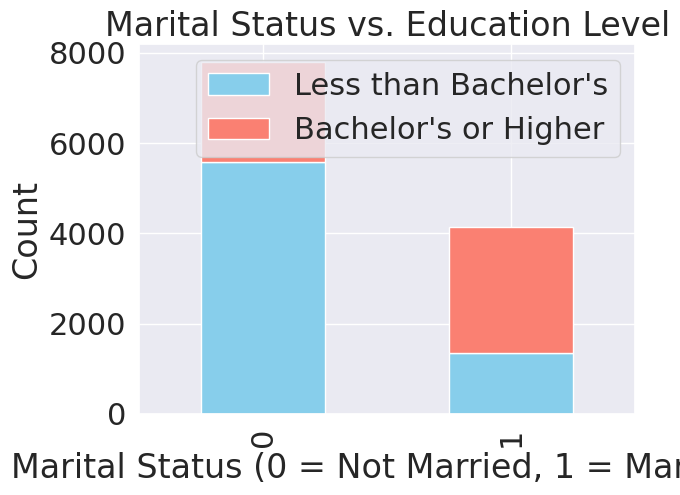

In [7]:

# inport chi square fuction
from scipy.stats import chi2_contingency
#compare variabl 'DMDMARTZ' and variable 'DMDEDUC2', to answer is there any significant statistic associaction betweent marital status and education level
contingency_table = pd.crosstab(nhanes_data['DMDMARTZ'], nhanes_data['DMDEDUC2'])
# eport chi square etc.
chi2, p, dof, ex = chi2_contingency(contingency_table)


print(f"Chi2 Statistic: {chi2}, p-value: {p}")
# Visualizations the outcome
contingency_table = pd.crosstab(nhanes_data['DMDMARTZ'], nhanes_data['DMDEDUC2'])

contingency_table.plot(kind="bar", stacked=True, color=["skyblue", "salmon"])
plt.title("Marital Status vs. Education Level")
plt.xlabel("Marital Status (0 = Not Married, 1 = Married)")
plt.ylabel("Count")
plt.legend(["Less than Bachelor's", "Bachelor's or Higher"])
plt.show()

#Question 2: Mean Difference in Sedentary Behavior Time Based on Marital Status

T-Statistic: -3.8740971309213887, p-value: 0.0001078679819334709


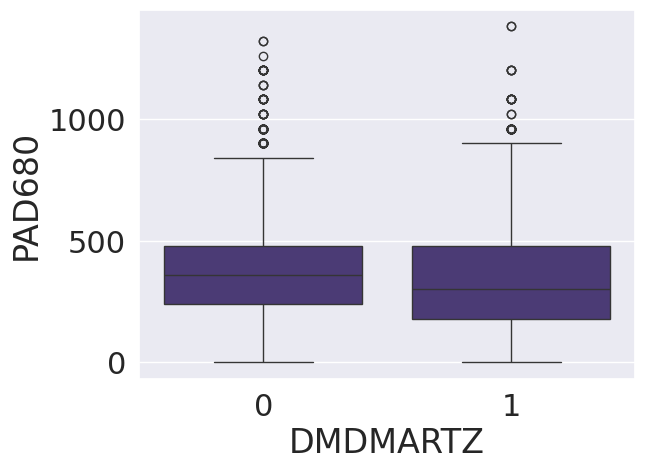

In [8]:
#import t test function
from scipy.stats import ttest_ind

# is there any statistic differce for sedentary behavior time between married and unmarried
married = nhanes_data[nhanes_data['DMDMARTZ'] == 1]['PAD680'].dropna()
not_married = nhanes_data[nhanes_data['DMDMARTZ'] == 0]['PAD680'].dropna()

t_stat, p_val = ttest_ind(married, not_married)

print(f"T-Statistic: {t_stat}, p-value: {p_val}")

sns.boxplot(x='DMDMARTZ', y='PAD680', data=nhanes_data)
plt.title('')
plt.show()


#Question 3: "How do age and marital status affect systolic blood pressure?"

                   sum_sq      df            F    PR(>F)
C(DMDMARTZ)  1.737748e+03     1.0     6.860916  0.008828
RIDAGEYR     5.889160e+05     1.0  2325.138035  0.000000
Residual     1.893791e+06  7477.0          NaN       NaN


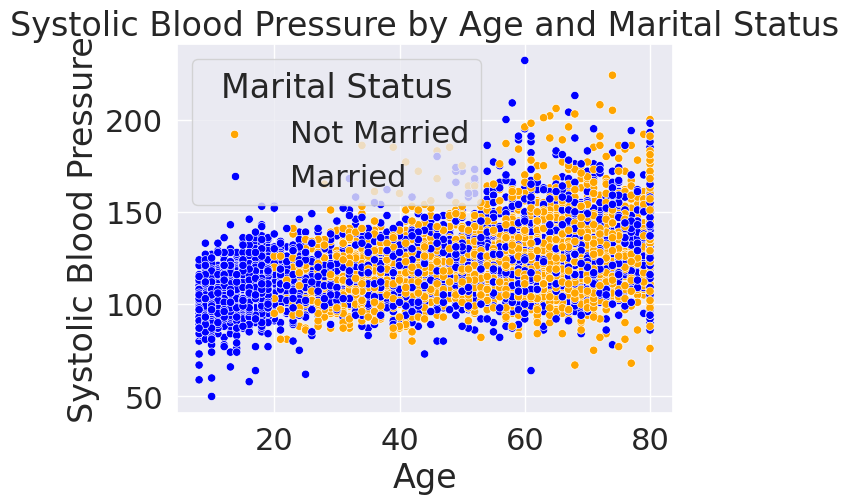

In [9]:
#import ANOVA function
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BPXOSY3 ~ RIDAGEYR + C(DMDMARTZ)', data=nhanes_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

sns.scatterplot(x='RIDAGEYR', y='BPXOSY3', hue='DMDMARTZ', data=nhanes_data, palette=['blue', 'orange'])
plt.title("Systolic Blood Pressure by Age and Marital Status")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.legend(title="Marital Status", labels=["Not Married", "Married"])
plt.show()

#Question 4: "Is there a correlation between self-reported weight and minutes of sedentary behavior?"

Correlation: 0.1559714584645021, p-value: 1.6988498386828133e-44


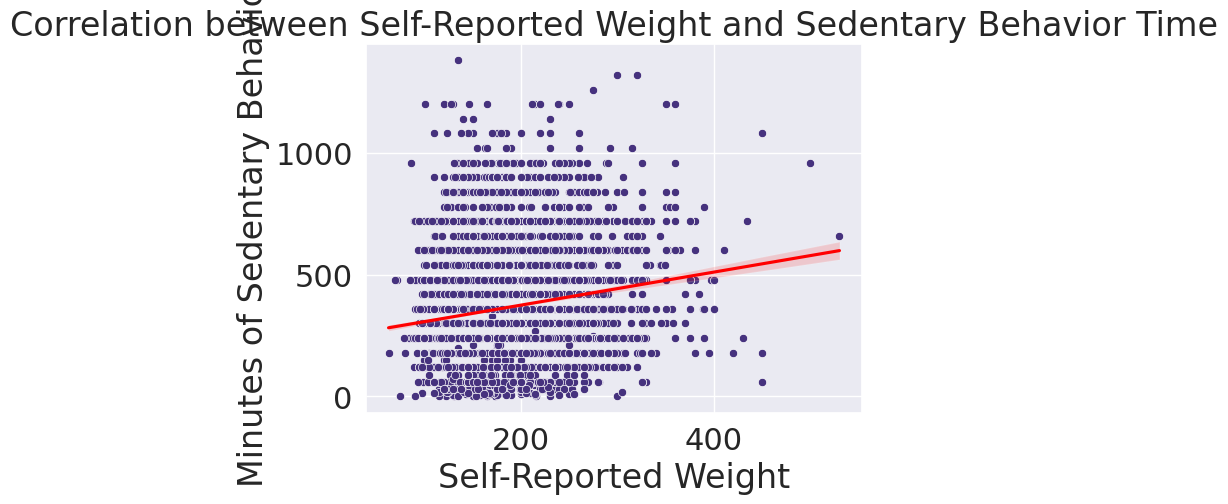

In [10]:
# Drop rows with NaN in either 'WHD020' or 'PAD680' to ensure equal length
subset_data = nhanes_data[['WHD020', 'PAD680']].dropna()

# Perform Pearson correlation
from scipy.stats import pearsonr
correlation, p_value = pearsonr(subset_data['WHD020'], subset_data['PAD680'])

print(f"Correlation: {correlation}, p-value: {p_value}")

sns.scatterplot(x='WHD020', y='PAD680', data=nhanes_data)
sns.regplot(x='WHD020', y='PAD680', data=nhanes_data, scatter=False, color='red')  # 添加趋势线
plt.title("Correlation between Self-Reported Weight and Sedentary Behavior Time")
plt.xlabel("Self-Reported Weight")
plt.ylabel("Minutes of Sedentary Behavior")
plt.show()

#

#Mean Difference in total Cholesterol Based on Marital Status

T-Statistic: 12.1753063614459, p-value: 9.336486050612347e-34


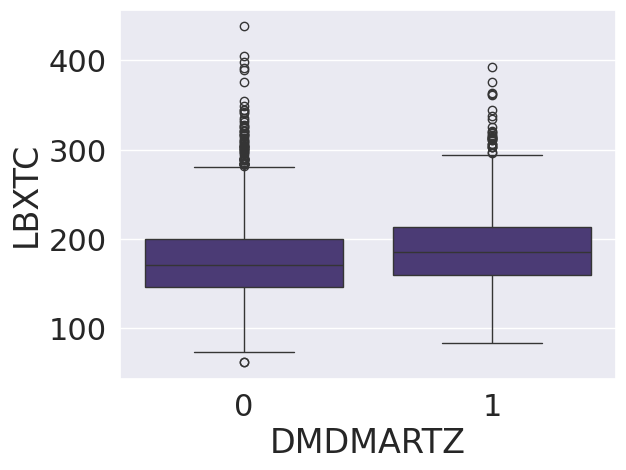

In [13]:
#import t test function
from scipy.stats import ttest_ind

# is there any statistic differce for sedentary behavior time between married and unmarried
married = nhanes_data[nhanes_data['DMDMARTZ'] == 1]['LBXTC'].dropna()
not_married = nhanes_data[nhanes_data['DMDMARTZ'] == 0]['LBXTC'].dropna()

t_stat, p_val = ttest_ind(married, not_married)

print(f"T-Statistic: {t_stat}, p-value: {p_val}")

sns.boxplot(x='DMDMARTZ', y='LBXTC', data=nhanes_data)
plt.title('')
plt.show()
